In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

src_data = "./data/stock1.pkl"
tickers = {"현대차": "A005380", "삼성전자": "A005930", "네이버": "A035420", "카카오": "A035720"}

data = pd.read_pickle(src_data)
data = data.loc[:, ["date", "close"]].reset_index()
prices = data.pivot(index="date", columns="ticker", values="close")
prices = prices["2018":"2021"]

df = prices[["현대차"]]
df = df.rename(columns={"현대차": "close"})

df["simple_rtn"] = df.close.pct_change()
df["log_rtn"] = np.log(df.close / df.close.shift(1))
df.dropna(axis=0, inplace=True)

cf.set_config_file(world_readable=True, theme="pearl", offline=True)
init_notebook_mode()

df.iplot(subplots=True, shape=(3, 1), shared_xaxes=True, title="HMC time series")

In [1]:
import numpy as np
import pandas as pd

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

cf.go_offline()
init_notebook_mode()

src_data = "./data/stock1.pkl"
tickers = {"현대차": "A005380", "삼성전자": "A005930", "네이버": "A035420", "카카오": "A035720"}

data = pd.read_pickle(src_data)
df = data.loc["현대차"]
df.set_index("date", inplace=True)
df = df["2018":"2021"].sort_index(axis=0, ascending=True)
df.head()

qf = cf.QuantFig(df, title="HMC's Stock Price", legend="top", name="HMC")
qf.add_volume()
qf.add_sma(periods=20, column="close", color="red")
qf.add_ema(periods=20, color="green")
qf.iplot()

C:\Users\mecha2k\AppData\Local\Temp/ipykernel_192/1710992858.py:16: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [1]:
import ipywidgets as wd
from ipywidgets import interact, interact_manual
import cufflinks as cf
import pandas as pd
import yfinance as yf
from plotly.offline import iplot, init_notebook_mode
from IPython.display import display 

stocks = ["TWTR", "MSFT", "GOOGL", "FB", "TSLA", "AAPL"]
indicators = ["Bollinger Bands", "MACD", "RSI"]

def ta_dashboard(
    asset,
    indicator,
    start_date,
    end_date,
    bb_k,
    bb_n,
    macd_fast,
    macd_slow,
    macd_signal,
    rsi_periods,
    rsi_upper,
    rsi_lower,
):

    df = yf.download(asset, start=start_date, end=end_date, progress=False, auto_adjust=True)
    qf = cf.QuantFig(df, title=f"TA Dashboard - {asset}", legend="right", name=f"{asset}")
    if "Bollinger Bands" in indicator:
        qf.add_bollinger_bands(periods=bb_n, boll_std=bb_k)
    if "MACD" in indicator:
        qf.add_macd(fast_period=macd_fast, slow_period=macd_slow, signal_period=macd_signal)
    if "RSI" in indicator:
        qf.add_rsi(
            periods=rsi_periods, rsi_upper=rsi_upper, rsi_lower=rsi_lower, showbands=True
        )
    return qf.iplot()

stocks_selector = wd.Dropdown(options=stocks, value=stocks[0], description="Asset")
indicator_selector = wd.SelectMultiple(
    description="Indicator", options=indicators, value=[indicators[0]]
)
start_date_selector = wd.DatePicker(
    description="Start Date", value=pd.to_datetime("2018-01-01"), continuous_update=False
)
end_date_selector = wd.DatePicker(
    description="End Date", value=pd.to_datetime("2018-12-31"), continuous_update=False
)
main_selector_label = wd.Label("Main parameters", layout=wd.Layout(height="45px"))
main_selector_box = wd.VBox(
    children=[
        main_selector_label,
        stocks_selector,
        indicator_selector,
        start_date_selector,
        end_date_selector,
    ]
)

bb_label = wd.Label("Bollinger Bands")
n_param = wd.IntSlider(
    value=20, min=1, max=40, step=1, description="N:", continuous_update=False
)
k_param = wd.FloatSlider(
    value=2, min=0.5, max=4, step=0.5, description="k:", continuous_update=False
)
bollinger_box = wd.VBox(children=[bb_label, n_param, k_param])

macd_label = wd.Label("MACD")
macd_fast = wd.IntSlider(
    value=12, min=2, max=50, step=1, description="Fast avg:", continuous_update=False
)
macd_slow = wd.IntSlider(
    value=26, min=2, max=50, step=1, description="Slow avg:", continuous_update=False
)
macd_signal = wd.IntSlider(
    value=9, min=2, max=50, step=1, description="MACD signal:", continuous_update=False
)
macd_box = wd.VBox(children=[macd_label, macd_fast, macd_slow, macd_signal])

rsi_label = wd.Label("RSI")
rsi_periods = wd.IntSlider(
    value=14, min=2, max=50, step=1, description="RSI periods:", continuous_update=False
)
rsi_upper = wd.IntSlider(
    value=70, min=1, max=100, step=1, description="Upper Thr:", continuous_update=False
)
rsi_lower = wd.IntSlider(
    value=30, min=1, max=100, step=1, description="Lower Thr:", continuous_update=False
)
rsi_box = wd.VBox(children=[rsi_label, rsi_periods, rsi_upper, rsi_lower])

sec_selector_label = wd.Label("Secondary parameters", layout=wd.Layout(height="45px"))
blank_label = wd.Label("", layout=wd.Layout(height="45px"))
sec_box_1 = wd.VBox([sec_selector_label, bollinger_box, macd_box])
sec_box_2 = wd.VBox([blank_label, rsi_box])
secondary_selector_box = wd.HBox([sec_box_1, sec_box_2])

controls_dict = {
    "asset": stocks_selector,
    "indicator": indicator_selector,
    "start_date": start_date_selector,
    "end_date": end_date_selector,
    "bb_k": k_param,
    "bb_n": n_param,
    "macd_fast": macd_fast,
    "macd_slow": macd_slow,
    "macd_signal": macd_signal,
    "rsi_periods": rsi_periods,
    "rsi_upper": rsi_upper,
    "rsi_lower": rsi_lower,
}
ui = wd.HBox([main_selector_box, secondary_selector_box])
out = wd.interactive_output(ta_dashboard, controls_dict)

display(ui, out)

Output()

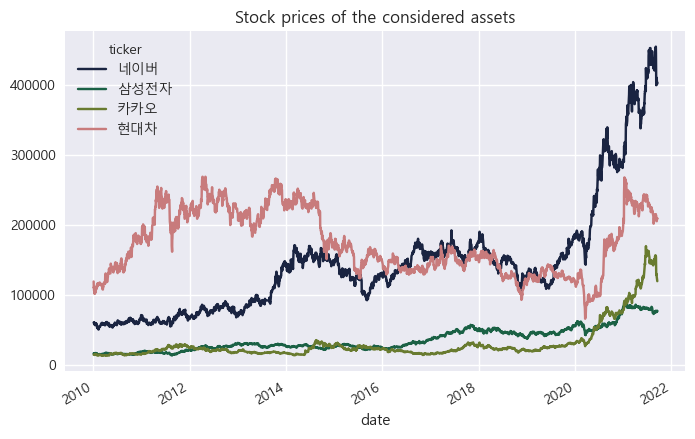

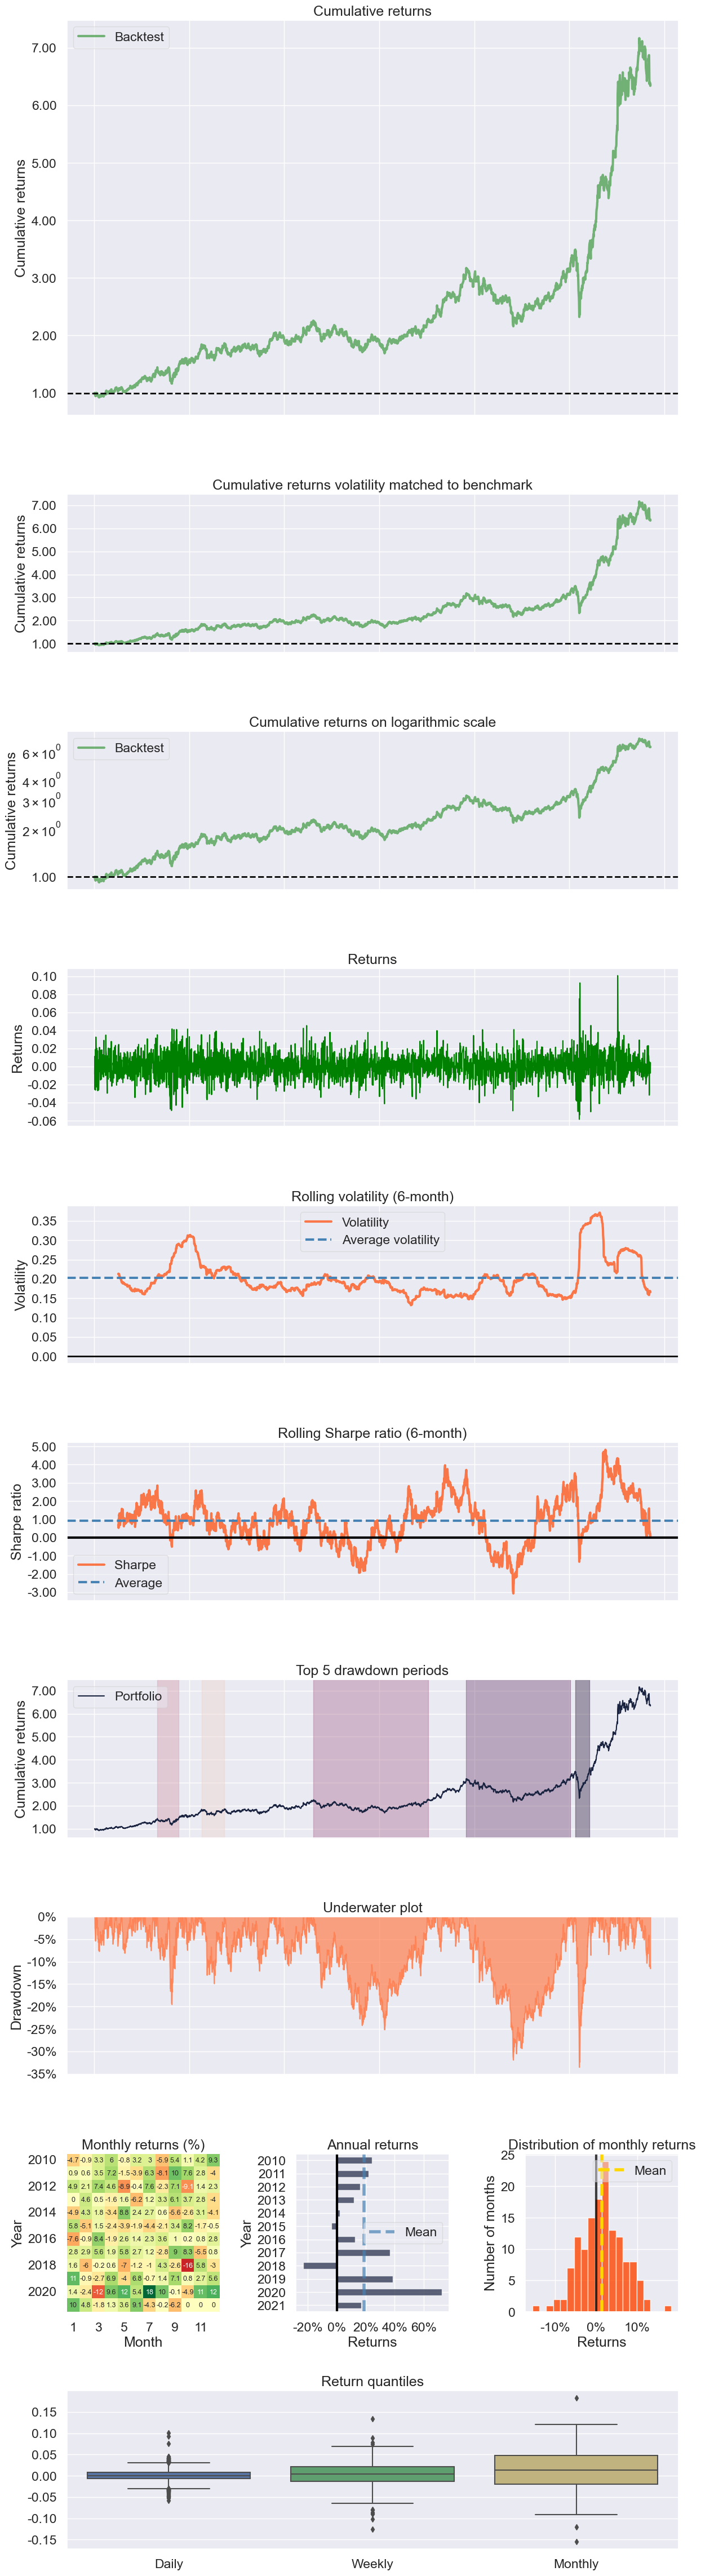

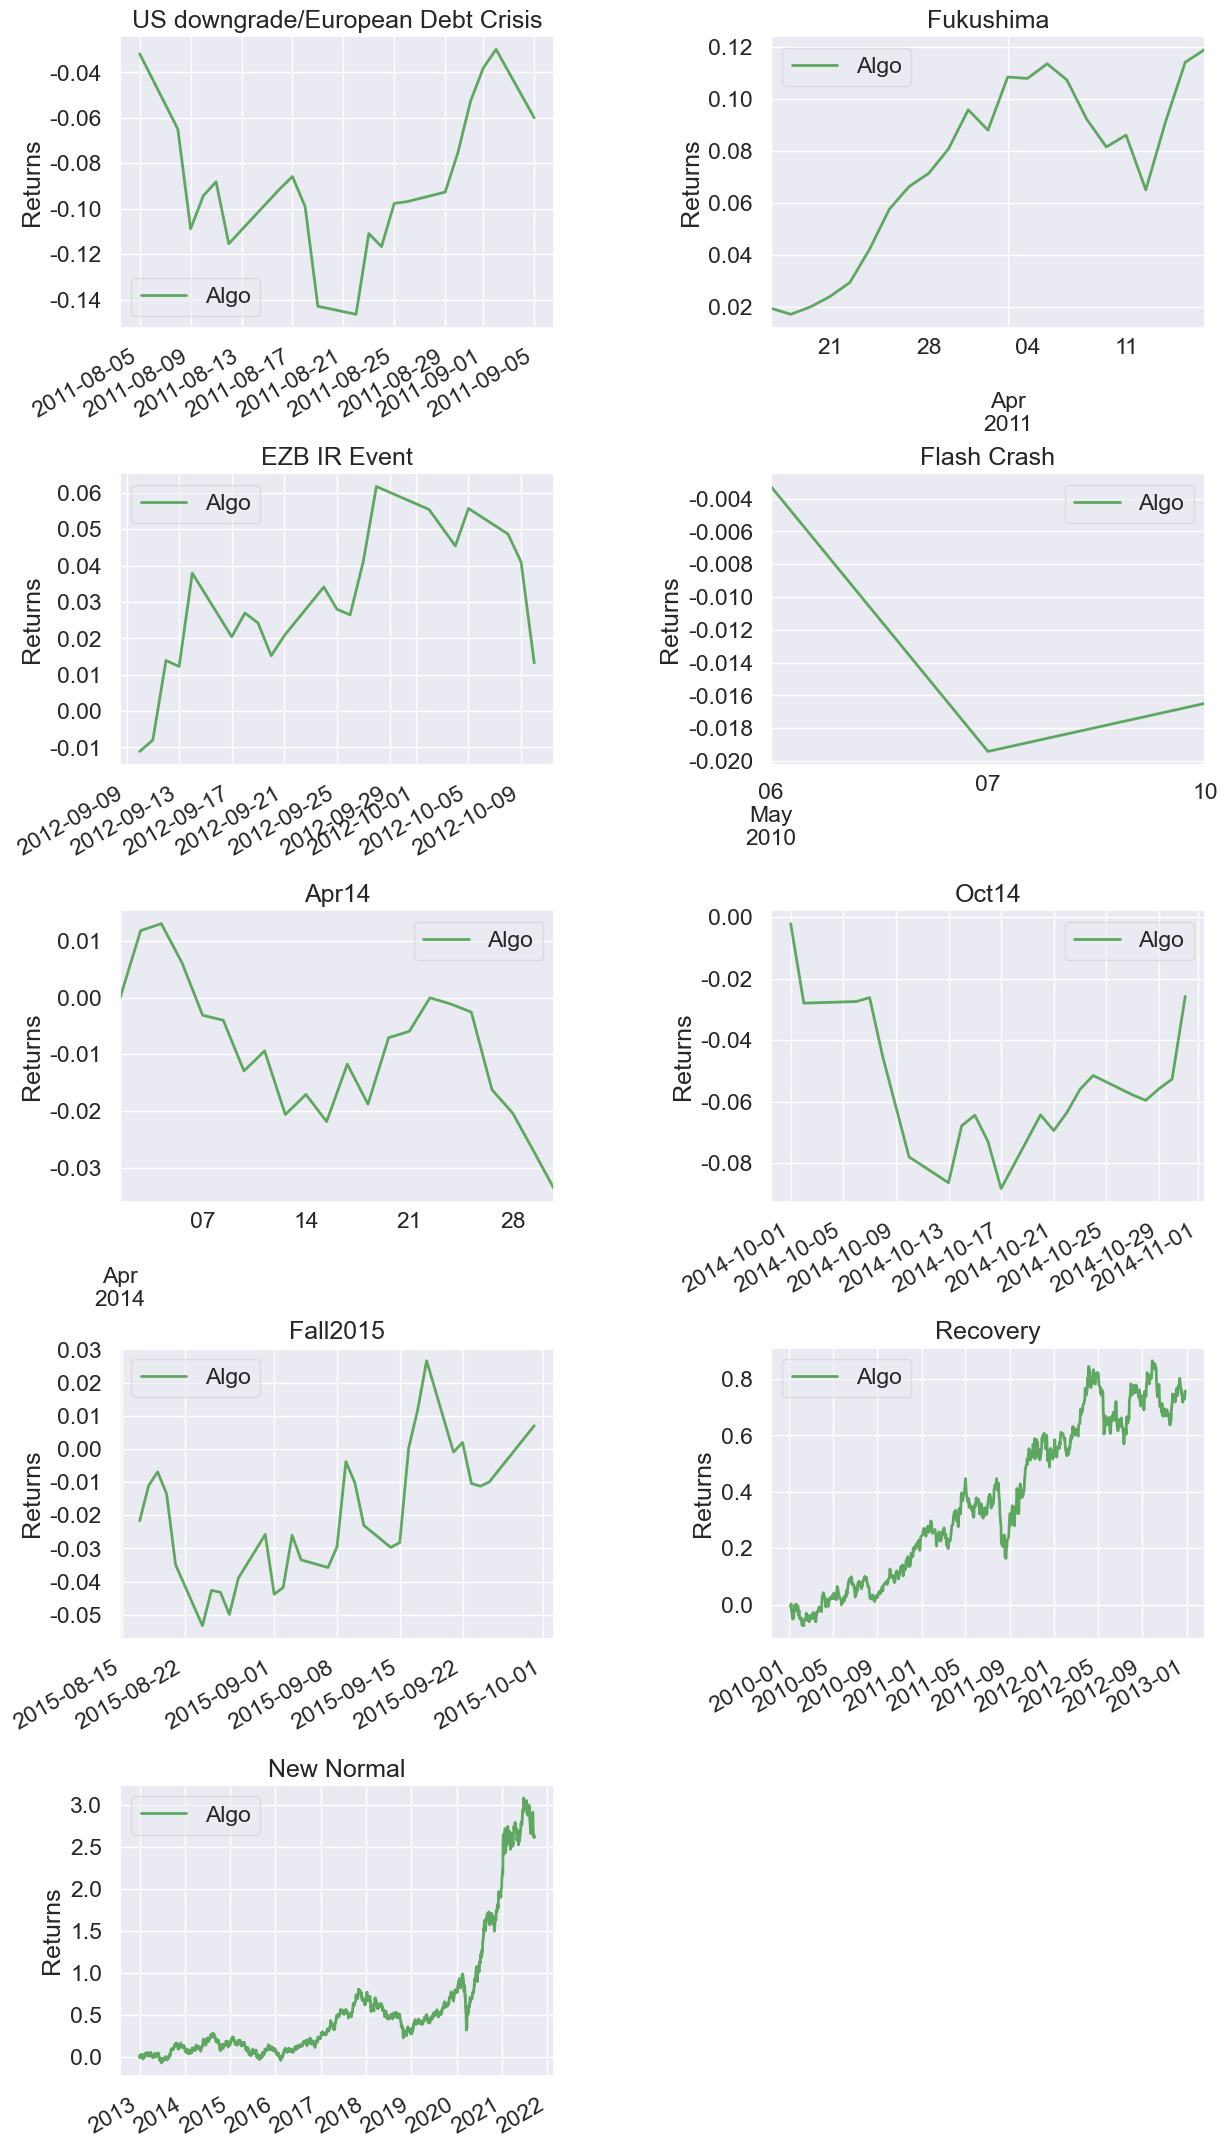

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyfolio as pf

from datetime import datetime
from IPython import display

plt.style.use("seaborn")
sns.set_palette("cubehelix")
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 100
warnings.simplefilter(action="ignore", category=FutureWarning)

df = pd.read_pickle("./data/stock1.pkl")
df = df.loc[:, ["date", "close"]].reset_index()
df = df.pivot(index="date", columns="ticker", values="close")
prices = df["2010-1":"2021-12"]
prices.head()

prices.plot(title="Stock prices of the considered assets")
plt.savefig("images/ch7_im101.png")

returns = prices.pct_change().dropna()
portfolio_weights = [0.25, 0.25, 0.25, 0.25]
portfolio_weights = [0.25, 0.41, 0.30, 0.04]
portfolio_weights = [0.18, 0.41, 0.19, 0.22]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)

# pf.create_simple_tear_sheet(portfolio_returns)
pf.create_full_tear_sheet(portfolio_returns)
# fig = pf.create_returns_tear_sheet(portfolio_returns, return_fig=True)
# fig.savefig("images/ch7_im102.png", dpi=300)